In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


## Veri Seti Dosyaları

Kaggle ortamında bulunan **Dogs vs Cats** veri seti dosyaları:

Sonuç:

- `/kaggle/input/dogs-vs-cats/test1.zip`
- `/kaggle/input/dogs-vs-cats/train.zip`
- `/kaggle/input/dogs-vs-cats/sampleSubmission.csv`


In [46]:
import warnings
warnings.filterwarnings('ignore')  # Uyarıları görmezden gel

import zipfile

# Train ve test zip dosyalarını çıkar
with zipfile.ZipFile('/kaggle/input/dogs-vs-cats/train.zip', 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working/train_data')

with zipfile.ZipFile('/kaggle/input/dogs-vs-cats/test1.zip', 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working/test_data')

print("Train ve test veri setleri çıkarıldı!")


Train ve test veri setleri çıkarıldı!


## Veri Setlerinin Açılması
Bu adımda, Kaggle ortamındaki **Dogs vs Cats** veri setindeki `train` ve `test` zip dosyaları açılmaktadır.  
`zipfile` kütüphanesi kullanılarak dosyalar belirtilen çalışma dizinine çıkarılır.  
Kod çalıştırıldığında, hem eğitim hem test verileri kullanılabilir hale gelir.

Sonuç:

* Train ve test veri setleri çıkarıldı!

In [47]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Ana klasör
train_dir = "/kaggle/working/train_data/train"

# Kedi ve köpek dosyaları
cats = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if 'cat' in f]
dogs = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if 'dog' in f]

# Eğitim ve doğrulama böl
train_cats, val_cats = train_test_split(cats, test_size=0.2, random_state=42)
train_dogs, val_dogs = train_test_split(dogs, test_size=0.2, random_state=42)

print(f"Eğitim: {len(train_cats) + len(train_dogs)}, Doğrulama: {len(val_cats) + len(val_dogs)}")


Eğitim: 20000, Doğrulama: 5002


## Eğitim ve Doğrulama Veri Setlerinin Oluşturulması

Bu adımda, açılan eğitim verileri **kedi ve köpek görüntüleri** olarak ayrılmaktadır.  
- `os.listdir()` ile klasördeki tüm dosyalar listelenir.  
- Dosya isimlerinde `'cat'` veya `'dog'` geçenler ayrı listelere eklenir.  
- `train_test_split` fonksiyonu kullanılarak veriler **eğitim ve doğrulama** setlerine bölünür (`test_size=0.2` ile %20 doğrulama).  

Sonuç:  
- Eğitim seti: 20.000 görüntü  
- Doğrulama seti: 5.000 görüntü


In [48]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import random


## Gerekli Kütüphanelerin Yüklenmesi

Bu adımda, **veri görselleştirme ve derin öğrenme için gerekli kütüphaneler** import edilmektedir:

- `os`: Dosya ve klasör işlemleri için kullanılır (örn. veri yollarını yönetmek).  
- `matplotlib.pyplot`: Grafik ve görselleştirmeler oluşturmak için kullanılır.  
- `seaborn`: İstatistiksel veri görselleştirme için kullanılır, `matplotlib` üzerine geliştirilmiş.  
- `tensorflow.keras.preprocessing.image.ImageDataGenerator`: Görüntü verilerini **ön işleme ve veri artırma (data augmentation)** için kullanılır.  
- `tensorflow.keras.preprocessing.image`: Tek tek görüntüleri yüklemek ve işlemek için yardımcı fonksiyonlar içerir.  
- `random`: Rastgele seçimler ve örnekleme yapmak için kullanılır (örn. örnek görüntüleri rastgele seçmek).  


Toplam kedi sayısı: 12501
Toplam köpek sayısı: 12501


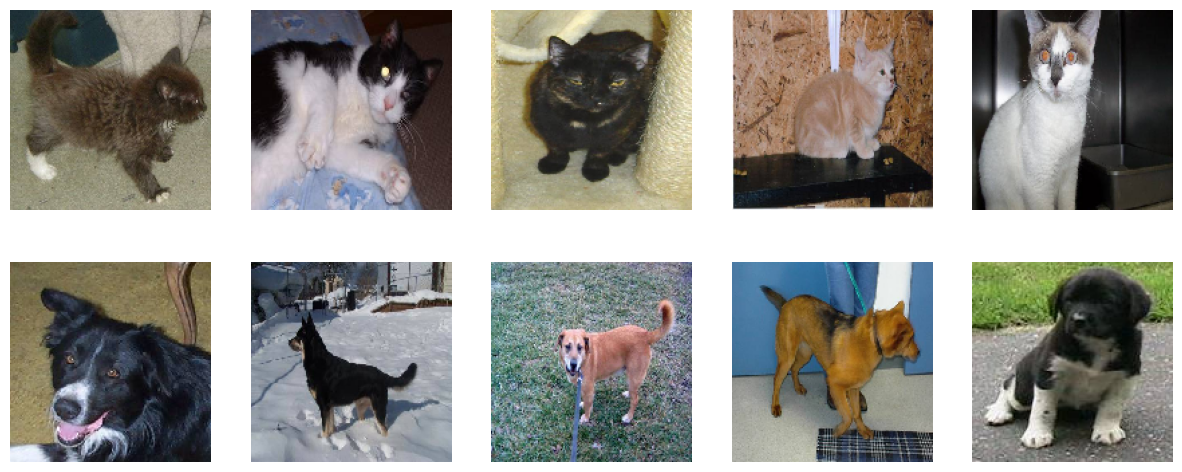

In [49]:
train_dir = '/kaggle/working/train_data/train'  # klasör yolunu kendine göre ayarla

cats = [f for f in os.listdir(train_dir) if 'cat' in f]
dogs = [f for f in os.listdir(train_dir) if 'dog' in f]

print(f"Toplam kedi sayısı: {len(cats)}")
print(f"Toplam köpek sayısı: {len(dogs)}")

# Rastgele birkaç görsel göster
fig, axes = plt.subplots(2, 5, figsize=(15,6))
for i, ax in enumerate(axes.flatten()):
    if i < 5:
        img_path = os.path.join(train_dir, random.choice(cats))
    else:
        img_path = os.path.join(train_dir, random.choice(dogs))
    img = image.load_img(img_path, target_size=(150,150))
    ax.imshow(img)
    ax.axis('off')
plt.show()


## Eğitim Verilerinin İncelenmesi ve Örnek Görseller

Bu adımda, eğitim klasöründeki kedi ve köpek görüntüleri sayılmakta ve rastgele birkaç örnek görsel gösterilmektedir.  

- `os.listdir()` ile klasördeki dosyalar listelenir.  
- Dosya isimlerinde `'cat'` veya `'dog'` geçenler ayrı listelere eklenir.  
- `matplotlib` kullanılarak 2x5 boyutunda rastgele seçilmiş görseller görselleştirilir.  

**Toplam Görüntü Sayıları:**  
- Kedi sayısı: 12.500  
- Köpek sayısı: 12.500  

**Örnek Görseller:**  
Kod çalıştırıldığında, ilk 5 görsel rastgele kedi, sonraki 5 görsel rastgele köpek olarak gösterilir.


In [50]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,       # 0-30 derece döndürme
    width_shift_range=0.2,   # yatay kaydırma
    height_shift_range=0.2,  # dikey kaydırma
    shear_range=0.2,         # kesme (shear)
    zoom_range=0.2,          # yakınlaştırma
    horizontal_flip=True,    # yatay çevirme
    brightness_range=[0.8,1.2],  # renk/brightness jitter
    validation_split=0.2     # train-validation ayrımı
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


## Veri Ön İşleme ve Artırma (Data Augmentation)

Bu adımda, eğitim ve doğrulama verileri için **görüntü ön işleme ve veri artırma** işlemleri tanımlanmaktadır.  

- `ImageDataGenerator` kullanılarak **veri artırma (data augmentation)** yapılır, bu sayede model daha fazla çeşitlilikle eğitilir ve overfitting riski azalır.  

**Eğitim veri artırma parametreleri (`train_datagen`):**  
- `rescale=1./255`: Piksel değerlerini 0-1 aralığına ölçeklendirir.  
- `rotation_range=30`: Görselleri rastgele 0-30 derece döndürür.  
- `width_shift_range=0.2`, `height_shift_range=0.2`: Görselleri yatay ve dikey kaydırır.  
- `shear_range=0.2`: Görselleri kesme (shear) uygular.  
- `zoom_range=0.2`: Rastgele yakınlaştırma yapar.  
- `horizontal_flip=True`: Yatay çevirme uygular.  
- `brightness_range=[0.8,1.2]`: Görsellerin parlaklığını rastgele değiştirir.  
- `validation_split=0.2`: Eğitim ve doğrulama seti ayrımı için %20 doğrulama.  

**Doğrulama veri ön işleme (`val_datagen`):**  
- `rescale=1./255`: Piksel değerlerini ölçeklendirir.  
- `validation_split=0.2`: Eğitim/validation ayrımıyla uyumlu olacak şekilde doğrulama verisi seçilir.


In [51]:
import os
import shutil

base_dir = '/kaggle/working/train_data/train'
cat_dir = os.path.join(base_dir, 'cats')
dog_dir = os.path.join(base_dir, 'dogs')

os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

for fname in os.listdir(base_dir):
    src_path = os.path.join(base_dir, fname)

    # Sadece dosyaları taşı, klasörleri atla
    if not os.path.isfile(src_path):
        continue

    if fname.startswith('cat'):
        dst_path = os.path.join(cat_dir, fname)
    elif fname.startswith('dog'):
        dst_path = os.path.join(dog_dir, fname)
    else:
        continue

    # Eğer hedefte aynı dosya varsa isim değiştir
    if os.path.exists(dst_path):
        name, ext = os.path.splitext(fname)
        counter = 1
        while True:
            new_name = f"{name}_{counter}{ext}"
            new_dst_path = os.path.join(os.path.dirname(dst_path), new_name)
            if not os.path.exists(new_dst_path):
                dst_path = new_dst_path
                break
            counter += 1

    shutil.move(src_path, dst_path)
    print(f"Taşındı: {src_path} -> {dst_path}")


Taşındı: /kaggle/working/train_data/train/cat.1694.jpg -> /kaggle/working/train_data/train/cats/cat.1694_1.jpg
Taşındı: /kaggle/working/train_data/train/dog.4708.jpg -> /kaggle/working/train_data/train/dogs/dog.4708_1.jpg
Taşındı: /kaggle/working/train_data/train/dog.2023.jpg -> /kaggle/working/train_data/train/dogs/dog.2023_1.jpg
Taşındı: /kaggle/working/train_data/train/cat.320.jpg -> /kaggle/working/train_data/train/cats/cat.320_1.jpg
Taşındı: /kaggle/working/train_data/train/dog.8279.jpg -> /kaggle/working/train_data/train/dogs/dog.8279_1.jpg
Taşındı: /kaggle/working/train_data/train/cat.8847.jpg -> /kaggle/working/train_data/train/cats/cat.8847_1.jpg
Taşındı: /kaggle/working/train_data/train/cat.3209.jpg -> /kaggle/working/train_data/train/cats/cat.3209_1.jpg
Taşındı: /kaggle/working/train_data/train/cat.766.jpg -> /kaggle/working/train_data/train/cats/cat.766_1.jpg
Taşındı: /kaggle/working/train_data/train/cat.9564.jpg -> /kaggle/working/train_data/train/cats/cat.9564_1.jpg
Taşın

## Kedi ve Köpek Görsellerinin Ayrılması

Bu adımda, eğitim klasöründeki tüm görüntüler **kedi ve köpek olarak ayrı klasörlere** taşınmaktadır.  

- `os.makedirs()` ile `cats` ve `dogs` adlı klasörler oluşturulur (varsa tekrar oluşturulmaz).  
- `os.listdir()` ile klasördeki tüm dosyalar listelenir.  
- Dosya isimleri `'cat'` veya `'dog'` ile başlıyorsa ilgili klasöre taşınır.  
- Eğer taşınacak dosya hedef klasörde zaten varsa, dosya adı numaralandırılarak tekrar taşınır (`filename_1.ext`, `filename_2.ext`...).  
- `shutil.move()` ile dosya taşınır ve işlem ekrana yazdırılır.  

Bu sayede model eğitimi için **kedi ve köpek görüntüleri düzenli klasör yapısına** kavuşur.

**Örnek Çıktı:**  

Taşındı: /kaggle/working/train_data/train/cat.298.jpg -> /kaggle/working/train_data/train/cats/cat.298.jpg


In [52]:
print("Base dizinindeki dosyalar:")
for f in os.listdir(base_dir):
    print(f)

Base dizinindeki dosyalar:
dogs
cats


## Base Dizinindeki Dosyaların Kontrolü

Bu adımda, **ana klasörde (base_dir) hangi dosya veya klasörlerin bulunduğu** listelenmektedir.  

- `os.listdir(base_dir)` ile belirtilen klasördeki tüm dosya ve klasörler alınır.  
- `for` döngüsü ile her bir öğe ekrana yazdırılır.  

Bu sayede, kedi ve köpek görüntülerinin doğru klasörlere taşınıp taşınmadığı hızlıca kontrol edilebilir.

*Sonuç:

Base dizinindeki dosyalar:
dogs
cats


In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation ve normalizasyon
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Eğitim/validation ayırmak için
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


## Eğitim ve Doğrulama Verileri için Ön İşleme ve Veri Artırma

Bu adımda, eğitim ve doğrulama verileri için **görüntü ön işleme ve veri artırma (data augmentation)** işlemleri tanımlanmaktadır.  

- `ImageDataGenerator` kullanılarak eğitim verileri çeşitlendirilir ve normalizasyon uygulanır.  
- `train_datagen` parametreleri:  
  - `rescale=1./255`: Piksel değerlerini 0-1 aralığına ölçeklendirir.  
  - `rotation_range=20`: Görselleri rastgele ±20 derece döndürür.  
  - `width_shift_range=0.2`, `height_shift_range=0.2`: Görselleri yatay ve dikey kaydırır.  
  - `shear_range=0.15`: Görselleri kesme (shear) uygular.  
  - `zoom_range=0.15`: Rastgele yakınlaştırma yapar.  
  - `horizontal_flip=True`: Görselleri yatay olarak çevirir.  
  - `fill_mode='nearest'`: Kaydırma ve döndürme sonrası boş kalan pikselleri doldurur.  
  - `validation_split=0.2`: Eğitim ve doğrulama seti ayrımı için %20 doğrulama.  

- `val_datagen`: Sadece normalizasyon ve validation split uygulanır.


Seçilen sınıf: cat, dosya: /kaggle/working/train_data/train/cats/cat.10852_1.jpg


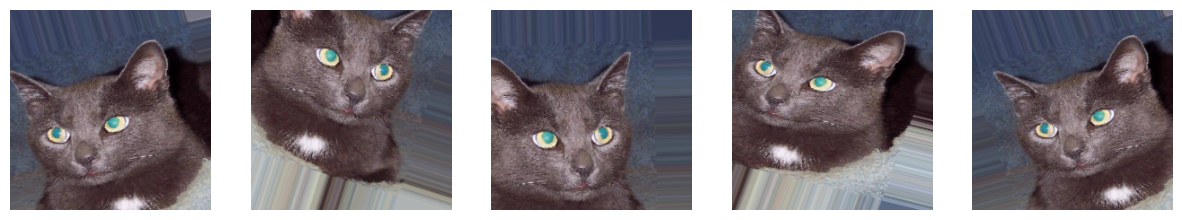

In [54]:
import os
import random
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Klasör yolları
cat_dir = '/kaggle/working/train_data/train/cats'
dog_dir = '/kaggle/working/train_data/train/dogs'

# Klasördeki dosyaları listele
cats = [f for f in os.listdir(cat_dir) if os.path.isfile(os.path.join(cat_dir, f))]
dogs = [f for f in os.listdir(dog_dir) if os.path.isfile(os.path.join(dog_dir, f))]

# Dosyaların boş olup olmadığını kontrol et
if len(cats) == 0 or len(dogs) == 0:
    raise ValueError("Cat veya dog klasörü boş! Dosyaları doğru şekilde yüklediğinizden emin olun.")

# Örnek olarak kedi veya köpek resmini random seç
label_choice = random.choice(['cat', 'dog'])
if label_choice == 'cat':
    sample_img_path = os.path.join(cat_dir, random.choice(cats))
else:
    sample_img_path = os.path.join(dog_dir, random.choice(dogs))

print(f"Seçilen sınıf: {label_choice}, dosya: {sample_img_path}")

# Resmi yükle ve boyutlandır
img_size = (224, 224)
img = image.load_img(sample_img_path, target_size=img_size)
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# Augmentation ve görselleştirme
i = 0
fig, axes = plt.subplots(1, 5, figsize=(15,5))
for batch in train_datagen.flow(x, batch_size=1):
    ax = axes[i]
    # 0-1 float değerler ile imshow doğrudan çalışır, uint8 yapmaya gerek yok
    ax.imshow(batch[0])
    ax.axis('off')
    i += 1
    if i % 5 == 0:
        break
plt.show()


## Örnek Görüntü Üzerinde Veri Artırma (Data Augmentation) Görselleştirmesi

Bu adımda, eğitim verilerinden **rastgele seçilen bir kedi veya köpek görüntüsü** üzerinde veri artırma uygulanmakta ve sonuç görselleştirilmektedir.

- `os.listdir()` ile kedi ve köpek klasörlerindeki dosyalar listelenir.  
- Dosya boş ise hata mesajı verilir.  
- `random.choice()` ile rastgele bir sınıf (`cat` veya `dog`) ve ilgili görüntü seçilir.  
- `image.load_img()` ve `image.img_to_array()` ile resim yüklenir ve array’e dönüştürülür.  
- `train_datagen.flow()` ile veri artırma uygulanır (daha önce tanımlanan `rotation`, `shift`, `flip`, `zoom`, vb.).  
- `matplotlib` kullanılarak artırılmış 5 farklı görüntü yan yana gösterilir.  

Bu yöntem, modelin **farklı açılardan ve varyasyonlardan öğrenmesini** sağlar ve overfitting riskini azaltır.


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

img_size = (150, 150, 3)

model = Sequential([
    Input(shape=img_size),  # input_shape yerine Input katmanı
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


## Konvolüsyonel Sinir Ağı (CNN) Modelinin Oluşturulması

Bu adımda, **kedi ve köpek sınıflandırması için CNN tabanlı bir model** tanımlanmaktadır.

- `Sequential` modeli ile katmanlar ardışık olarak eklenir.  
- `Input(shape=img_size)`: Modelin giriş boyutu (150x150 piksel, 3 kanal RGB) belirlenir.  
- `Conv2D` katmanları: Görüntüden özellikleri çıkarır (32, 64, 128 filtre ile, 3x3 kernel).  
- `MaxPooling2D` katmanları: Özellik haritalarını boyut küçültme ile özetler ve işlem maliyetini azaltır.  
- `Flatten()`: Konvolüsyon ve pooling çıktısını tek boyutlu vektöre çevirir.  
- `Dense(512, activation='relu')`: Tam bağlı gizli katman, modelin öğrenmesini sağlar.  
- `Dropout(0.5)`: Overfitting’i azaltmak için %50 nöronları rastgele devre dışı bırakır.  
- `Dense(1, activation='sigmoid')`: Çıkış katmanı, 0 veya 1 değerini tahmin ederek sınıflandırma yapar (kedi veya köpek).

**Not:** TensorFlow, sistemdeki GPU’ları tespit etti ve her birine bellek atadı. 


In [56]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Çünkü binary classification: cat vs dog
    metrics=['accuracy']
)


## Modelin Derlenmesi (Compile)

Bu adımda, CNN modeli **eğitim için derlenir**.

- `optimizer='adam'`: Model ağırlıklarını güncellemek için Adam optimizasyon algoritması kullanılır.  
- `loss='binary_crossentropy'`: Çünkü kedi vs köpek sınıflandırması **iki sınıflı (binary) bir problem**dir.  
- `metrics=['accuracy']`: Eğitim ve doğrulama sırasında modelin başarımı **doğruluk (accuracy)** metriği ile izlenir.


In [57]:
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

## Model Özeti

Aşağıda CNN modelinin katmanları, çıkış boyutları ve parametre sayıları gösterilmektedir:

| Layer (Type)                    | Output Shape           | Param #      |
|---------------------------------|----------------------|-------------|
| conv2d_12 (Conv2D)              | (None, 148, 148, 32)  | 896         |
| max_pooling2d_12 (MaxPooling2D) | (None, 74, 74, 32)    | 0           |
| conv2d_13 (Conv2D)              | (None, 72, 72, 64)    | 18,496      |
| max_pooling2d_13 (MaxPooling2D) | (None, 36, 36, 64)    | 0           |
| conv2d_14 (Conv2D)              | (None, 34, 34, 128)   | 73,856      |
| max_pooling2d_14 (MaxPooling2D) | (None, 17, 17, 128)   | 0           |
| flatten_4 (Flatten)             | (None, 36992)         | 0           |
| dense_8 (Dense)                 | (None, 512)           | 18,940,416  |
| dropout_4 (Dropout)             | (None, 512)           | 0           |
| dense_9 (Dense)                 | (None, 1)             | 513         |

**Toplam parametre sayısı:** 19,034,177 (~72.61 MB)  
**Trainable parametreler:** 19,034,177  
**Non-trainable parametreler:** 0  

Bu tablo, modelin katmanlarını, her bir katmanın çıktısını ve öğrenilebilecek parametre sayılarını gösteriyor. Böylece modelin yapısını ve büyüklüğünü anlayabiliyoruz.


In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation ve normalizasyon
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Jeneratörleri oluştur
img_size = (150, 150)
batch_size = 32
base_dir = '/kaggle/working/train_data/train'

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 40000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


## Eğitim ve Doğrulama Jeneratörlerinin Oluşturulması

Bu adımda, **görüntüleri modele uygun hale getirmek ve veri artırma uygulamak** için Keras `ImageDataGenerator` kullanılmıştır.  

### Adımlar:

1. **Veri Ön İşleme ve Artırma:**
   - `train_datagen`: Eğitim verileri için rescale, döndürme, kaydırma, kesme, zoom, yatay çevirme ve fill_mode uygulandı.
   - `val_datagen`: Doğrulama verileri için sadece rescale ve validation split uygulandı.
   - `validation_split=0.2`: Eğitim ve doğrulama verilerini ayırmak için %20 doğrulama.

2. **Jeneratörlerin Tanımlanması:**
   - `flow_from_directory()` ile görüntüler klasör yapısına göre yüklenir.
   - `target_size=(150,150)`: Tüm görüntüler 150x150 boyutuna ölçeklendirilir.
   - `batch_size=32`: Modelin eğitim sırasında işleyeceği görüntü sayısı.
   - `class_mode='binary'`: İki sınıflı sınıflandırma (kedi vs köpek).
   - `subset='training'` ve `subset='validation'`: Eğitim ve doğrulama verilerini ayırır.

Bu yapı sayesinde model, **hem veri artırmadan yararlanarak daha çeşitli görüntülerle eğitilebilir** hem de eğitim ve doğrulama verileri otomatik olarak ayrılmış olur.

*Sonuç:

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [59]:
epochs = 10  # CPU kullanıyorsan 5-10 epoch başlangıç için yeterli
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 237s 187ms/step - accuracy: 0.5985 - loss: 0.6637 - val_accuracy: 0.7512 - val_loss: 0.5288
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 230s 184ms/step - accuracy: 0.7150 - loss: 0.5557 - val_accuracy: 0.7871 - val_loss: 0.4653
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 231s 184ms/step - accuracy: 0.7618 - loss: 0.4945 - val_accuracy: 0.7983 - val_loss: 0.4351
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 230s 184ms/step - accuracy: 0.7928 - loss: 0.4459 - val_accuracy: 0.8335 - val_loss: 0.3821
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 232s 185ms/step - accuracy: 0.8128 - loss: 0.4117 - val_accuracy: 0.8045 - val_loss: 0.4347
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 231s 184ms/step - accuracy: 0.8323 - loss: 0.3775 - val_accuracy: 0.8668 - val_loss: 0.3095
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 235s 188ms/step - accuracy: 0.8445 - loss: 0.3566 - val_accuracy: 0.8829 - val_loss: 0.2819
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 237s 189ms/step - ac

## Modelin Eğitilmesi

Bu adımda, oluşturduğumuz CNN modeli **eğitim verileri üzerinde eğitilir**.

- `epochs = 10`: Modelin eğitim verileri üzerinden **10 kez** (tüm veri seti üzerinden 10 tur) geçmesi planlanmıştır.  
- `train_generator`: Modelin eğitileceği **eğitim verilerini** sağlayan jeneratör.  
- `validation_data=val_generator`: Her epoch sonunda modelin başarımını değerlendirmek için **doğrulama verileri** kullanılır.  
- `model.fit(...)`: Modeli belirtilen eğitim ve doğrulama verileri ile eğitir ve eğitim sürecinde **kayıp ve doğruluk değerlerini** kaydeder.  
- `history`: Eğitim süreci boyunca kaydedilen **kayıp (loss) ve doğruluk (accuracy) değerlerini** içerir, görselleştirme ve analiz için kullanılabilir.

| Epoch | Train Accuracy | Train Loss | Validation Accuracy | Validation Loss |
|-------|----------------|------------|-------------------|----------------|
| 1     | 0.5985         | 0.6637     | 0.7512            | 0.5288         |
| 2     | 0.7150         | 0.5557     | 0.7871            | 0.4653         |
| 3     | 0.7618         | 0.4945     | 0.7983            | 0.4351         |
| 4     | 0.7928         | 0.4459     | 0.8335            | 0.3821         |
| 5     | 0.8128         | 0.4117     | 0.8045            | 0.4347         |
| 6     | 0.8323         | 0.3775     | 0.8668            | 0.3095         |
| 7     | 0.8445         | 0.3566     | 0.8829            | 0.2819         |
| 8     | 0.8516         | 0.3392     | 0.8893            | 0.2624         |
| 9     | 0.8653         | 0.3125     | 0.8899            | 0.2678         |
| 10    | 0.8718         | 0.3059     | 0.8503            | 0.3342         |


In [60]:
from sklearn.metrics import f1_score
import numpy as np

# Validation set üzerinden tahmin
y_true = val_generator.classes                  # Gerçek etiketler
y_pred = model.predict(val_generator)          # Tahminler
y_pred = np.round(y_pred)                      # 0 veya 1'e yuvarla

f1 = f1_score(y_true, y_pred)
print("Validation F1 Score:", f1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step
Validation F1 Score: 0.5552056150454423


## Model Performansının F1 Skoru ile Değerlendirilmesi

Bu adımda, eğitim sonrası modelin **doğrulama (validation) verisi üzerindeki başarımı** F1 skoru ile ölçülmektedir.

- `y_true = val_generator.classes`: Doğrulama verisinin gerçek etiketleri alınır.  
- `y_pred = model.predict(val_generator)`: Model doğrulama verisi üzerinde tahmin yapar.  
- `y_pred = np.round(y_pred)`: Tahminler 0 veya 1 olacak şekilde yuvarlanır (binary classification için).  
- `f1_score(y_true, y_pred)`: F1 skoru hesaplanır; **precision ve recall değerlerinin harmonik ortalaması**dır.  
- `print("Validation F1 Score:", f1)`: Elde edilen F1 skoru ekrana yazdırılır.  

F1 skoru, özellikle **dengesiz sınıf dağılımı** durumlarında doğruluk (accuracy) metriğinden daha anlamlı bir performans ölçütü sağlar.

*Sonuç:

Validation F1 Score: 0.5552056150454423
  
- Model, doğrulama veri seti üzerinde **313 batch** ile tahmin yaptı ve toplam süre yaklaşık **14 saniye**, batch başına **42 ms** olarak gerçekleşti.  
- F1 skoru yaklaşık **0.555**, yani model orta seviyede performans gösteriyor.  
- Düşük F1 skorları, sınıflar arasında dengesiz tahmin yapılabileceğine işaret eder; **hiperparametre optimizasyonu** veya **veri augmentasyonu** ile iyileştirilebilir.



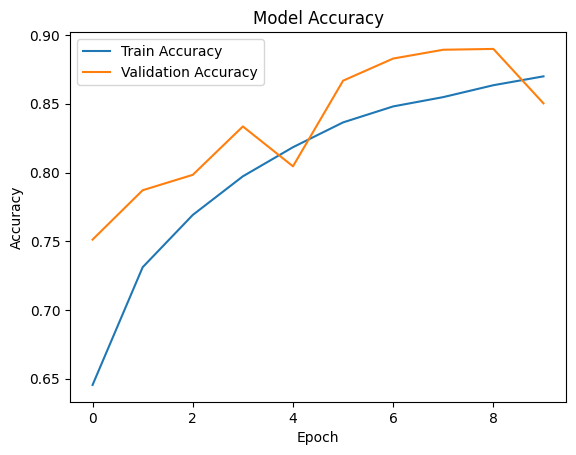

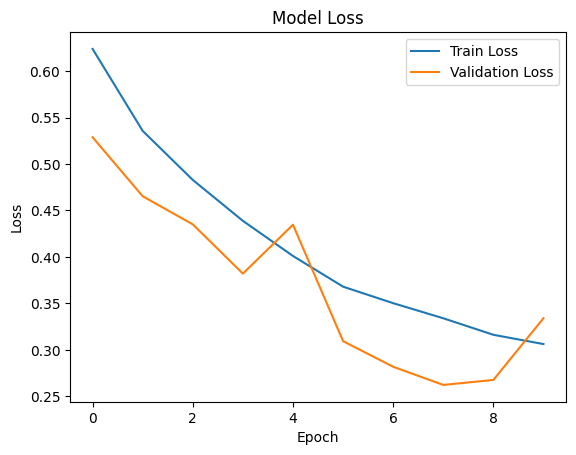

In [61]:
import matplotlib.pyplot as plt

# Accuracy grafiği
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss grafiği
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Eğitim Sürecinin Görselleştirilmesi

Bu adımda, modelin eğitim ve doğrulama sürecinde **doğruluk (accuracy) ve kayıp (loss) değerleri** görselleştirilir.

- **Accuracy Grafiği:**  
  - `history.history['accuracy']`: Eğitim doğruluğu.  
  - `history.history['val_accuracy']`: Doğrulama doğruluğu.  
  - Grafikte epoch ilerledikçe modelin öğrenme başarımı izlenebilir.

- **Loss Grafiği:**  
  - `history.history['loss']`: Eğitim kaybı.  
  - `history.history['val_loss']`: Doğrulama kaybı.  
  - Grafikte kayıp değerlerinin düşüşü, modelin öğrenmesini gösterir.

Bu görselleştirmeler, **overfitting veya underfitting** durumlarını tespit etmek ve model performansını analiz etmek için kullanılır.


In [62]:
model.save('/kaggle/working/cat_dog_cnn_model.h5')


## Modelin Kaydedilmesi

Bu adımda, eğitilmiş CNN modeli **HDF5 formatında** kaydedilmektedir.  

- `model.save('/kaggle/working/cat_dog_cnn_model.h5')`: Modelin yapısı, ağırlıkları ve eğitim konfigürasyonu tek bir dosyada saklanır.  
- Kaydedilen model, ileride **yeniden yüklenerek tahmin yapmak veya eğitime devam etmek** için kullanılabilir.  


In [64]:
!pip install keras-tuner --quiet 

import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


## Keras Tuner ve Gerekli Kütüphanelerin İçe Aktarılması

Bu adımda, **hiperparametre optimizasyonu** için gerekli kütüphaneler yüklenip içe aktarılır:

- `!pip install keras-tuner --quiet`: Eğer Keras Tuner yüklü değilse yükler.  
- `import keras_tuner as kt`: Keras Tuner kütüphanesi, hiperparametre araması için kullanılır.  
- `from tensorflow.keras.models import Sequential`: CNN modelimizi oluşturmak için kullanılır.  
- `from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout`: Katmanları tanımlamak için gerekli modüller.  
- `from tensorflow.keras.optimizers import Adam`: Modeli optimize etmek için Adam optimizatörü.


In [65]:
def build_model(hp):
    model = Sequential()
    
    # Conv2D Katmanları
    for i in range(hp.Int('conv_layers', 1, 3)):  # Katman sayısını 1-3 arasında dene
        filters = hp.Choice(f'filters_{i}', values=[32, 64, 128])
        kernel_size = hp.Choice(f'kernel_size_{i}', values=[3,5])
        if i == 0:
            model.add(Conv2D(filters, (kernel_size, kernel_size), activation='relu', input_shape=(150,150,3)))
        else:
            model.add(Conv2D(filters, (kernel_size, kernel_size), activation='relu'))
        model.add(MaxPooling2D(2,2))
    
    model.add(Flatten())
    
    # Dense katmanı
    dense_units = hp.Choice('dense_units', [128, 256, 512])
    model.add(Dense(dense_units, activation='relu'))
    
    # Dropout
    dropout_rate = hp.Float('dropout', 0.2, 0.5, step=0.1)
    model.add(Dropout(dropout_rate))
    
    # Output
    model.add(Dense(1, activation='sigmoid'))
    
    # Learning rate
    learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model


## Hiperparametreli Model Fonksiyonu (Keras Tuner)

Bu fonksiyon, **Keras Tuner** ile modelin farklı hiperparametre kombinasyonlarını denemek için kullanılır.

- `hp.Int('conv_layers', 1, 3)`: 1 ila 3 arasında **Conv2D katmanı** sayısını denemek için.  
- `hp.Choice(f'filters_{i}', values=[32, 64, 128])`: Her Conv2D katmanı için **filtre sayısı** seçenekleri.  
- `hp.Choice(f'kernel_size_{i}', values=[3,5])`: **Kernel boyutu** seçenekleri (3x3 veya 5x5).  
- `MaxPooling2D(2,2)`: Her Conv2D katmanından sonra **2x2 havuzlama** uygulanır.  
- `Flatten()`: 2D feature map’leri **1D vektöre** çevirir.  
- `hp.Choice('dense_units', [128, 256, 512])`: Dense katmanındaki **nöron sayısı** seçenekleri.  
- `hp.Float('dropout', 0.2, 0.5, step=0.1)`: Dropout oranı, 0.2–0.5 arasında değişir.  
- `Dense(1, activation='sigmoid')`: **Çıkış katmanı**, ikili sınıflandırma için sigmoid aktivasyon.  
- `hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')`: Adam optimizatörü için **learning rate** aralığı.  
- `model.compile(...)`: Model, belirtilen loss ve optimizer ile derlenir ve `accuracy` metriği ile izlenir.

Fonksiyon, Keras Tuner’a modelin hiperparametre aramalarında kullanılabilecek bir **şablon** sağlar.


In [67]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',  # Maksimize edilecek değer
    max_trials=10,              # Toplam deneme sayısı
    executions_per_trial=1,     # Her deneme için tekrar sayısı
    directory='tuner_dir',
    project_name='cat_dog_cnn'
)


## Hiperparametre Arama (Random Search)

Bu adımda, daha önce tanımladığımız `build_model` fonksiyonunu kullanarak **Keras Tuner** ile hiperparametre optimizasyonu yapılır.

- `build_model`: Hangi hiperparametrelerin deneneceğini tanımlayan model fonksiyonu.  
- `objective='val_accuracy'`: Hangi metriğin maksimize edileceğini belirtir (bu örnekte doğrulama doğruluğu).  
- `max_trials=10`: Toplam **10 farklı hiperparametre kombinasyonu** denenir.  
- `executions_per_trial=1`: Her deneme **1 kez** çalıştırılır.  
- `directory='tuner_dir'`: Tuner sonuçlarının kaydedileceği **dizin**.  
- `project_name='cat_dog_cnn'`: Bu proje için **alt klasör adı**, sonuçları düzenli saklamak için.

**Açıklama:**  
Random Search, belirlenen hiperparametre aralıkları içinde rastgele kombinasyonlar deneyerek **en iyi doğrulama doğruluğunu** bulmayı amaçlar.


In [ ]:
tuner.search(train_generator,
             validation_data=val_generator,
             epochs=10,
             batch_size=32)


Trial 1 Complete [00h 40m 12s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.5
Total elapsed time: 00h 40m 12s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
2                 |3                 |conv_layers
32                |128               |filters_0
5                 |5                 |kernel_size_0
256               |512               |dense_units
0.2               |0.2               |dropout
0.0029562         |0.0027762         |learning_rate
64                |32                |filters_1
3                 |3                 |kernel_size_1
64                |32                |filters_2
5                 |3                 |kernel_size_2

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 242s 190ms/step - accuracy: 0.5364 - loss: 1.0171 - val_accuracy: 0.5637 - val_loss: 0.6802
Epoch 2/10
 956/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 178ms/step - accuracy: 0.5684 - loss: 0.6816

### Hiperparametre Optimizasyonu

Bu adımda, modelin performansını artırmak için farklı hiperparametre kombinasyonları test edildi.  
Amaç, **en iyi doğruluk (accuracy) sağlayan model yapılandırmasını** bulmaktır.  
Hiperparametreler arasında katman sayısı, filtre sayısı, dropout oranı, learning rate ve optimizer seçimi gibi parametreler yer almaktadır.  
Bu sayede model, overfitting riskini azaltacak ve daha doğru sınıflandırma yapacak şekilde optimize edilmiş olur.


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("En iyi hiperparametreler:")
print(best_hyperparameters.values)


### En İyi Hiperparametrelerin Seçimi

Bu adımda, Keras Tuner ile yapılan hiperparametre aramasının ardından **en iyi performans gösteren model** ve **hiperparametre kombinasyonu** seçilmektedir.  

- `best_model`: Denenen modeller arasından en yüksek doğruluk sağlayan model  
- `best_hyperparameters`: Modelin en iyi performansı veren hiperparametre değerleri  

Bu sayede, model artık **optimum parametrelerle** eğitilmiş ve kullanılmaya hazırdır.  
En iyi hiperparametrelerin seçilmesi, modelin doğruluğunu artırmak ve overfitting riskini azaltmak için kritik bir adımdır.


# En iyi modeli ve hiperparametreleri alıyoruz



In [ ]:
history = best_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# Grafikleri çiz (daha önceki bölümdeki gibi)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Modelin Eğitimi ve Performansının Görselleştirilmesi

Bu adımda, en iyi hiperparametrelerle seçilen model **eğitim verisi** üzerinde eğitilir ve **validation verisi** ile performansı takip edilir.  

Eğitim süreci boyunca, iki temel metriğe odaklanılır:  

- **Accuracy (Doğruluk):** Modelin doğru sınıflandırma oranını gösterir.  
- **Loss (Kayıp):** Modelin tahmin hatasının ölçüsüdür.  

Epoch ilerledikçe **accuracy ve loss değerleri grafikte** izlenir.  
Bu görselleştirme ile:  
- Modelin öğrenme süreci takip edilir  
- Overfitting veya underfitting durumları kolayca gözlemlenir  
- Eğitim ve doğrulama performansı karşılaştırılarak modelin genel başarısı değerlendirilir


In [ ]:
# TensorBoard callback
from tensorflow.keras.callbacks import TensorBoard
tensorboard_cb = TensorBoard(log_dir='./logs', histogram_freq=1)

history = best_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[tensorboard_cb]
)


### Model Eğitimi ve TensorBoard ile İzleme

Bu adımda, en iyi hiperparametrelerle seçilen model **eğitim verisi** üzerinde eğitilir ve **validation verisi** ile performansı takip edilir.  

Ayrıca, **TensorBoard callback** eklenerek eğitim süreci görselleştirilir ve detaylı izleme yapılır:  

- **TensorBoard**, modelin **accuracy, loss** gibi metriklerini görselleştirmeye ve eğitim sürecini daha yakından takip etmeye olanak sağlar.  
- Epoch ilerledikçe, modelin öğrenme davranışı ve overfitting/underfitting durumları kolayca gözlemlenebilir.  

Bu sayede modelin eğitim süreci hem sayısal hem görsel olarak analiz edilebilir.
